In [1]:
import sympy as sp
from sympy import Ellipse, Point, S, Eq, latex, plot_implicit, solve
from sympy import symbols, simplify, Rational, Matrix, Line
from sympy import cos as Cos
from sympy import sin as Sin
from IPython.display import Latex, display

# Практическое занятие 15
# Компьютерный практикум по алгебре на Python
### Задание 1.
Построить эллипс с центром в точке А(1, 2), полуосями 3 и 2. Вычислить и вывести на экран эксцентриситет, площадь и длину дуги полученного эллипса, центр, полуоси, periapsis, apoapsis, межфокусное расстояние и фокусы.

Указание: составить словарь с ключами - названиями ('center', 'hradius', 'vradius' и т.п.) и значениями - атрибутами эллипса (.center, .hradius, ...), затем в цикле вывести все значения атрибутов из словаря вместе с названиями, например, "hradius=3".

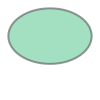

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [2]:
Ellipse_1 = Ellipse(Point(1, 2), hradius=3, vradius=2)
display(Ellipse_1)
props = {'center': Ellipse_1.center,
         'hradius': Ellipse_1.hradius,
         'vradius': Ellipse_1.vradius,
         'area': Ellipse_1.area,
         'circumference': Ellipse_1.circumference,
         'eccentricity': Ellipse_1.eccentricity,
         'periapsis': Ellipse_1.periapsis,
         'apoapsis': Ellipse_1.apoapsis,
         'focus\_distance': Ellipse_1.focus_distance,
         'foci': Ellipse_1.foci}
display(*[Latex(fr'${key} = {latex(props[key])}$') for key in props])

### Задание 2.
Вывести на экран **уравнение** эллипса из задания 1, повернутого на 30 градусов против часовой стрелки относительно его центра,  переменные $u$ и $v$.

Изобразить на общем графике эллипс и повернутый эллипс.

**Указание:** по углу определить значение _slope аргумента метода equation (это тангенс угла наклона), использовать plot_implicit.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

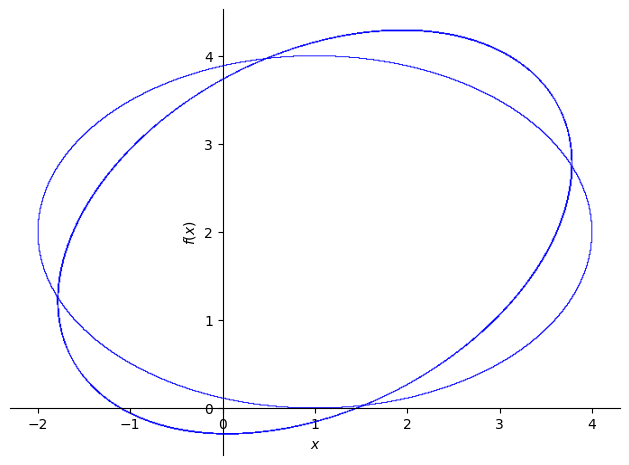

In [44]:
Ellipse_1_equation = Ellipse_1.equation(x='u', y='v')
Ellipse_1_equation_30_deg = Ellipse_1.equation(x='u', y='v', _slope=(sp.sqrt(3) / 3))
display(Latex(fr"$$0^{{\circ}}: {latex(Eq(Ellipse_1_equation, 0))}$$"))
display(Latex(fr"$$30^{{\circ}}: {latex(Eq(Ellipse_1_equation_30_deg, 0))}$$"))

plots = sp.plot(show=False)
plots.extend(plot_implicit(Ellipse_1_equation_30_deg, show=False))
plots.extend(plot_implicit(Ellipse_1_equation, show=False))
plots.show()


### Задание 3.
Найти вершины эллипса из Задания 1.

**Указание:** вершины эллипса искать как решение системы уравнений, составленной из уравнения эллипса и уравнения прямой, проходящей через форкусы (воспользоваться Line и методом equation()); вторую пару вершин получить как решение системы из уравнения эллипса и прямой, проходящей через центр эллипса перпендикулярно прямой, проходящей через фокусы.

In [48]:
u, v = symbols('u v')
foc_line1 = Line(Ellipse_1.foci[0], Ellipse_1.foci[1])
foc_line2 = foc_line1.perpendicular_line(Ellipse_1.center)
eq1 = Ellipse_1.equation(x=u, y=v)
eq_line1 = foc_line1.equation(x=u, y=v)
eq_line2 = foc_line2.equation(x=u, y=v)
system1 = [eq1, eq_line1]
system2 = [eq1, eq_line2]
solve1 = solve(system1, u, v)
solve2 = solve(system2, u, v)
point1 = Point(solve1[0][0], solve1[0][1])
point2 = Point(solve1[1][0], solve1[1][1])
point3 = Point(solve2[0][0], solve2[0][1])
point4 = Point(solve2[1][0], solve2[1][1])

display(point1, point2, point3, point4)

Point2D(-2, 2)

Point2D(4, 2)

Point2D(1, 0)

Point2D(1, 4)

### Задание 4.
Провести касательные к эллипсу из Задания 1 через его вершины.

Указание: использовать equation прямых Line, plot_implicit. Для корректного изображения на графике горизонтальных прямых в plot_implicit указывать диапазоны значений и переменной $x$ и переменной $y$.

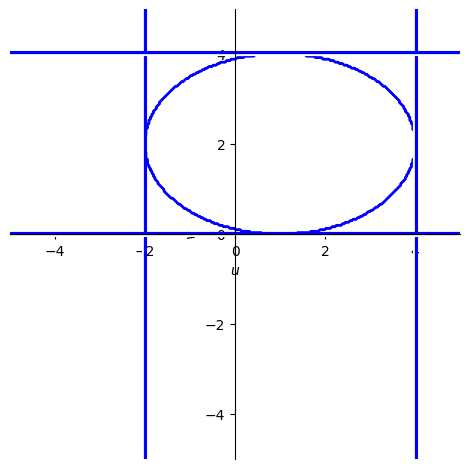

In [50]:
p = plot_implicit(eq1,
              (u, -5, 5),
              (v, -5, 5),
              aspect_ratio=(1, 1),
              adaptive=False, show=False)
points = [point1, point2, point3, point4]
for point in points:
    tangent = Line(Ellipse_1.center, point).perpendicular_line(point).equation(x=u, y=v)
    p.extend(plot_implicit(tangent,
                        (u,-10,10),
                        (v,-10,10),
                        aspect_ratio=(1, 1),
                        adaptive=False,
                        show=False))
p.show()

### Задание 5**.
Построить дочерний класс эллипсов Ellipse_rot, в этом классе должна быть переменная угол поворота, по умолчанию 0 и матрица поворота rot_matr__, по умолчанию None. По умолчанию центр эллипса в начале координат, но при построении экземпляра пользователь может задать другой центр. При построении экземпляра класса пользователь должен иметь возможность задать угол поворота. Матрица поворота - внутренняя переменная, она должна изменяться только при вызове метода change_angle, изменяющего угол поворота.

**Атрибуты класса:**

**focus_distance** фокусное расстояние $c = \sqrt{a^2 - b^2}$

**foci фокусы** в виде кортежа из точек Point

**angle** угол наклона в радианах

**slope** тангенс угла наклона (None для угла, кратного $\pi / 2$, угол от $- 2 \pi$ до $2 \pi$)

**rot_matr** (не путать с rot_matr__!!!) - матрица поворота $\left(\begin{matrix}\cos\alpha&-\sin\alpha\\ \sin\alpha&\cos\alpha\end{matrix}\right).$


**Методы:**

**change_angle** аргумент - новое значение угла поворота, метод изменяет переменную angle и матрицу поворота

**equation** возвращает уравнение эллипса, соответствующее углу поворота эллипса, у этого метода необязательные аргументы - имена переменных, по умолчанию $x$ и $y$.


Протестировать полученный класс так: создать эллипс с осями 12 и 9, центр в точке $(-1, 2)$, угол поворота $\pi / 3$, вывести на экран его эксцентриситет, фокусное расстояние, фокусы, тангенс угла наклона, матрицу поворота и уравнение. Затем заменить угол поворота на $\pi / 4$ и вывести на экран те же атрибуты и результаты работы методов, только уравнение вывести с переменными $u$ и $v$.

###  Индивидуальное задание
Эллипс с центром $A$, вертикальной полуосью $b$ и эксцентриситетом $\varepsilon$.
Изобразить на графике эллипс, а также эллипс, повернутый на угол $\alpha$ градусов против часовой стрелки.

Вывести на экран центр и фокусы эллипса, длины полуосей, уравнение эллипса, вершины эллипса.

Вариант N 175

Центр $\operatorname{Point2D}\left(1, 5\right)$, вертикальная полуось $8$, эксцентриситет $9 / 10$, угол поворота $\pi / 3$, по часовой стрелке.


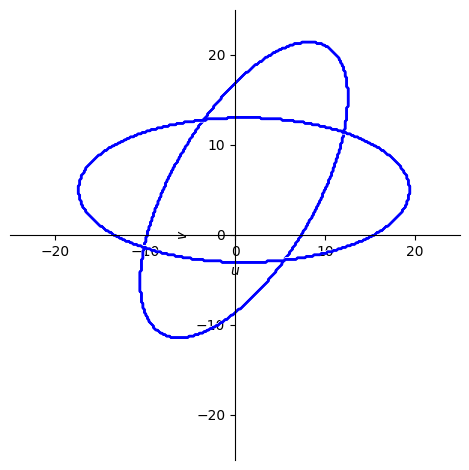

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Point2D(1 - 80*sqrt(19)/19, 5)

Point2D(1 + 80*sqrt(19)/19, 5)

Point2D(1, -3)

Point2D(1, 13)

In [51]:
Ellipse_2 = Ellipse(Point(1, 5), vradius=8, eccentricity=S(9)/10)
expr1 = Ellipse_2.equation(x=u, y=v)
expr2 = Ellipse_2.equation(x=u, y=v, _slope=sp.tan(sp.pi / 3))
eq1 = Eq(expr1, 0)
eq2 = Eq(expr2, 0)
p = plot_implicit(eq2,
              (u, -25, 25),
              (v, -25, 25),
              aspect_ratio=(1, 1),
              adaptive=False, show=False)
p.extend(plot_implicit(eq1,
              (u, -25, 25),
              (v, -25, 25),
              aspect_ratio=(1, 1),
              adaptive=False, show=False))
p.show()

atributes = {'center': Ellipse_2.center,
             'foci': Ellipse_2.foci,
             'hradius': Ellipse_2.hradius,
             'vradius': Ellipse_2.vradius,
             'equation': Eq(Ellipse_2.equation(x='x', y='y'), 0)}
display(*[Latex(f'{key} = {latex(atributes[key])}') for key in atributes])

foc_line1 = Line(Ellipse_2.foci[0], Ellipse_2.foci[1])
foc_line2 = foc_line1.perpendicular_line(Ellipse_2.center)
eq1 = Ellipse_2.equation(x=u, y=v)
eq_line1 = foc_line1.equation(x=u, y=v)
eq_line2 = foc_line2.equation(x=u, y=v)
system1 = [eq1, eq_line1]
system2 = [eq1, eq_line2]
solve1 = solve(system1, u, v)
solve2 = solve(system2, u, v)
point1 = Point(solve1[0][0], solve1[0][1])
point2 = Point(solve1[1][0], solve1[1][1])
point3 = Point(solve2[0][0], solve2[0][1])
point4 = Point(solve2[1][0], solve2[1][1])

display(point1, point2, point3, point4)